##  HEART HEALTH PREDICTION 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Heart_health.csv')
df.head(10)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Blood Pressure(mmHg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack
0,1,John Doe,45,Male,175,80,120/80,200,90,No,3,0
1,2,Jane Smith,35,Female,160,65,110/70,180,80,No,2,0
2,3,Michael Johnson,55,Male,180,85,130/85,220,95,Yes,4,1
3,4,Sarah Brown,40,Female,165,70,115/75,190,85,No,3,0
4,5,David Lee,50,Male,170,75,125/80,210,92,Yes,2,1
5,6,Emily Davis,30,Female,155,60,105/65,170,75,No,1,0
6,7,Robert Wilson,60,Male,175,82,135/85,230,98,No,3,1
7,8,Amanda Martinez,38,Female,162,68,118/72,195,88,No,2,0
8,9,Christopher Taylor,48,Male,178,78,128/82,205,94,Yes,4,1
9,10,Laura Garcia,42,Female,168,72,120/78,200,90,Yes,3,0


In [3]:
# shape of data
df.shape

(724, 12)

In [4]:
# information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    724 non-null    int64 
 1   Name                  724 non-null    object
 2   Age                   724 non-null    int64 
 3   Gender                724 non-null    object
 4   Height(cm)            724 non-null    int64 
 5   Weight(kg)            724 non-null    int64 
 6   Blood Pressure(mmHg)  724 non-null    object
 7   Cholesterol(mg/dL)    724 non-null    int64 
 8   Glucose(mg/dL)        724 non-null    int64 
 9   Smoker                724 non-null    object
 10  Exercise(hours/week)  724 non-null    int64 
 11  Heart Attack          724 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 68.0+ KB


The data is clean with no null values, since we have a total of 724 non_null values, same as the number of total entries.

In [5]:
# description 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,724.0,361.712707,207.901609,1.0,181.75,362.5,543.25,714.0
Age,724.0,44.842541,8.162429,30.0,38.00,44.0,53.00,60.0
Height(cm),724.0,171.161602,6.242018,155.0,166.00,170.0,177.00,183.0
Weight(kg),724.0,75.610497,6.368595,60.0,71.00,75.0,81.00,89.0
Cholesterol(mg/dL),724.0,206.022099,11.224704,170.0,195.00,210.0,215.00,230.0
Glucose(mg/dL),724.0,92.179558,4.662712,75.0,88.00,92.0,96.00,100.0
Exercise(hours/week),724.0,2.770718,0.934907,1.0,2.00,3.0,4.00,4.0
Heart Attack,724.0,0.599448,0.490349,0.0,0.00,1.0,1.00,1.0


1. The average age of patient admitted is 45 years 

Text(0.5, 1.0, 'Number of Males and Females by smoking habits')

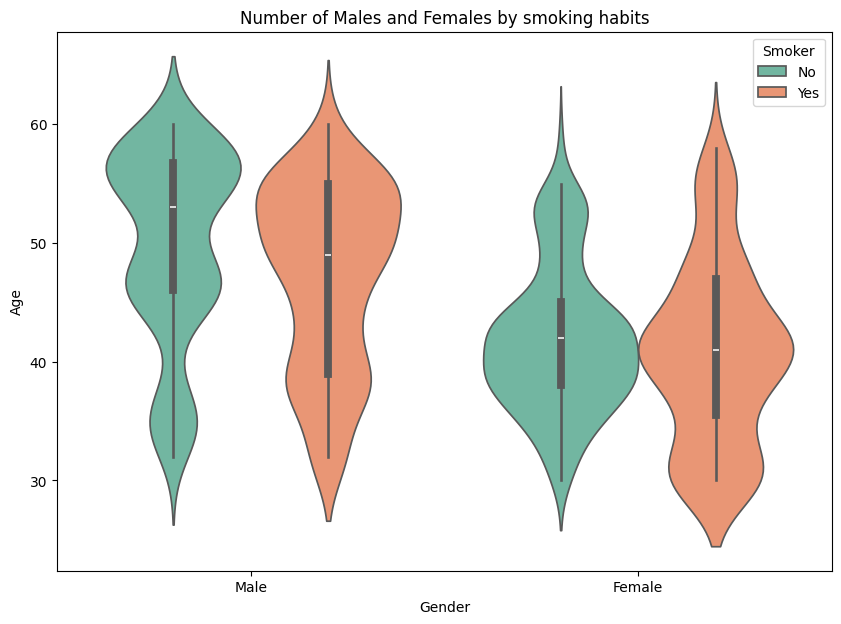

In [6]:
# group smokers and non-smokers by gender
plt.figure(figsize=(10,7))
sns.violinplot(x='Gender', y='Age', data=df, palette='Set2', hue='Smoker')
plt.title('Number of Males and Females by smoking habits')

<Axes: title={'center': 'Number of male and female patients'}, ylabel='Heart Attack'>

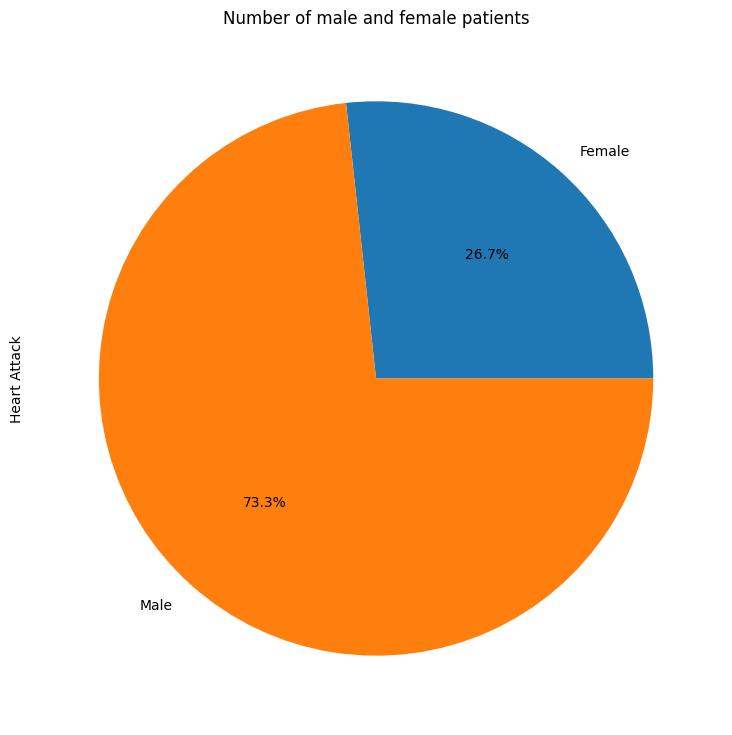

In [7]:
# total number of patients
plt.figure(figsize=(9,9))
heart_attack_by_gender = df.groupby('Gender')['Heart Attack'].sum()
heart_attack_by_gender.plot(kind='pie', autopct='%1.1f%%',
                            title = 'Number of male and female patients')

Text(0.5, 1.0, 'Box plot of smooking habits of patients')

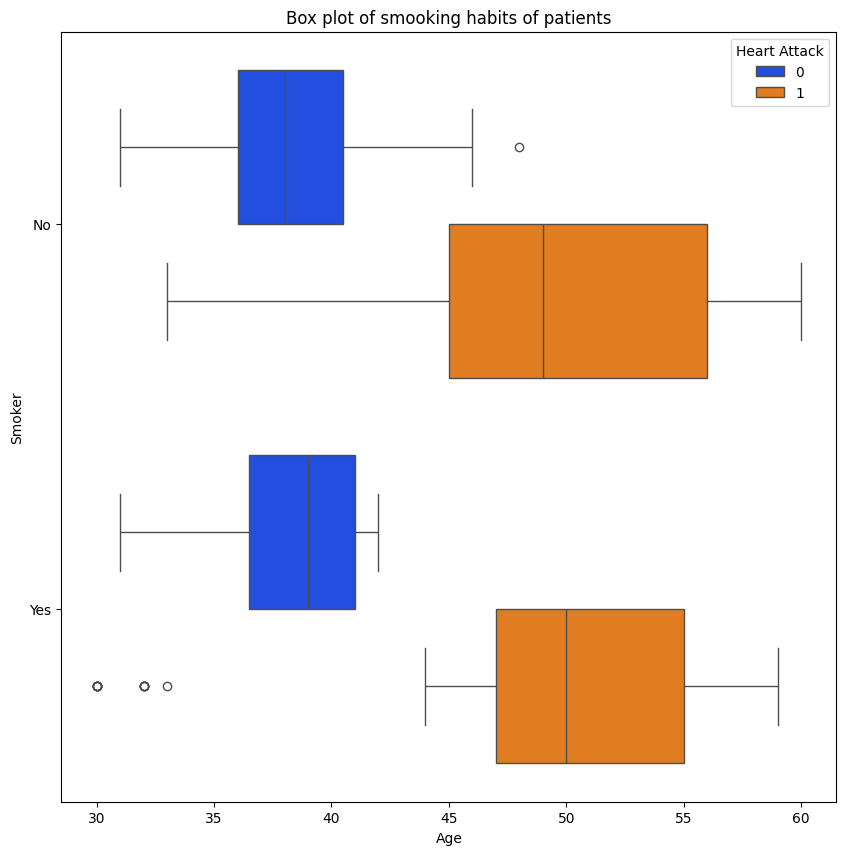

In [8]:
# plot the level of cholestrol by age

#sample some data from the dataset
plt.figure(figsize=(10,10))
sampled_df = df.sample(n=250, random_state=42)
sns.boxplot(x='Age', y='Smoker', data=sampled_df, hue='Heart Attack', palette='bright')
plt.xlabel('Age')
plt.ylabel('Smoker')
plt.title('Box plot of smooking habits of patients')

**Visualization of diabetic and non-diabetic patients by their weights**

Text(0.5, 1.0, 'Distribution of patient with heart attacks by Cholesterol level')

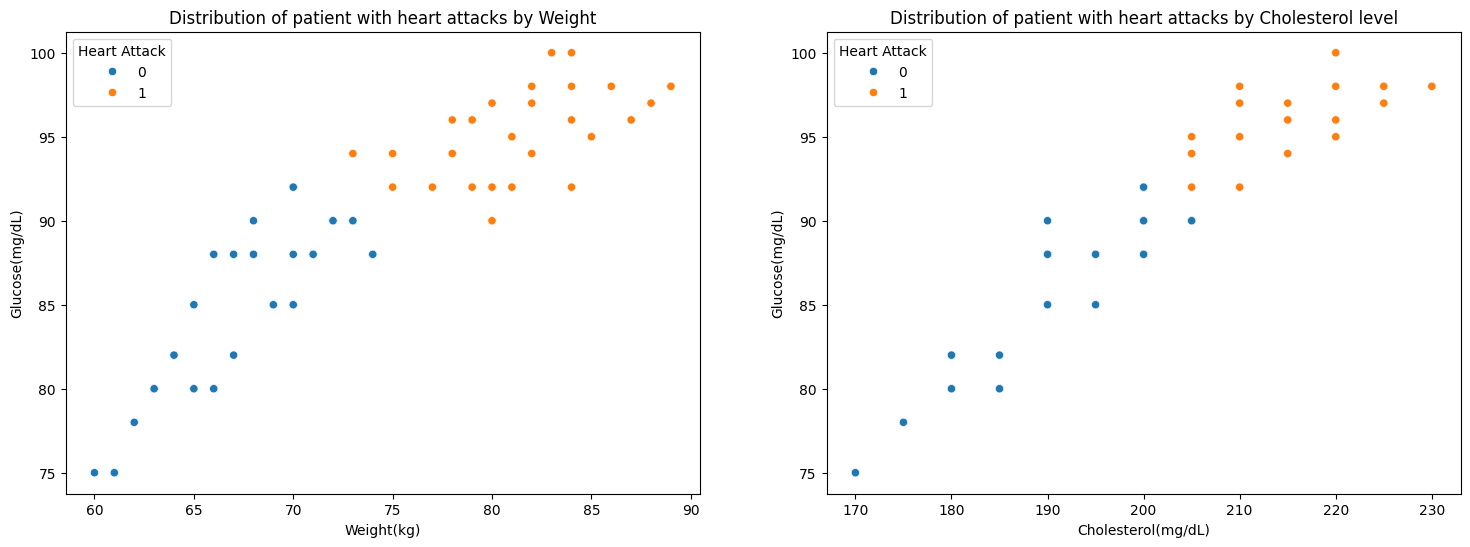

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.scatterplot(ax =axes[0], data=df, x="Weight(kg)", y="Glucose(mg/dL)",  hue="Heart Attack")
sns.scatterplot(ax = axes[1], data=df, x="Cholesterol(mg/dL)", y="Glucose(mg/dL)",  hue="Heart Attack")
axes[0].set_title("Distribution of patient with heart attacks by Weight")
axes[1].set_title("Distribution of patient with heart attacks by Cholesterol level")

C:\Users\DAVID\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 900x800 with 0 Axes>

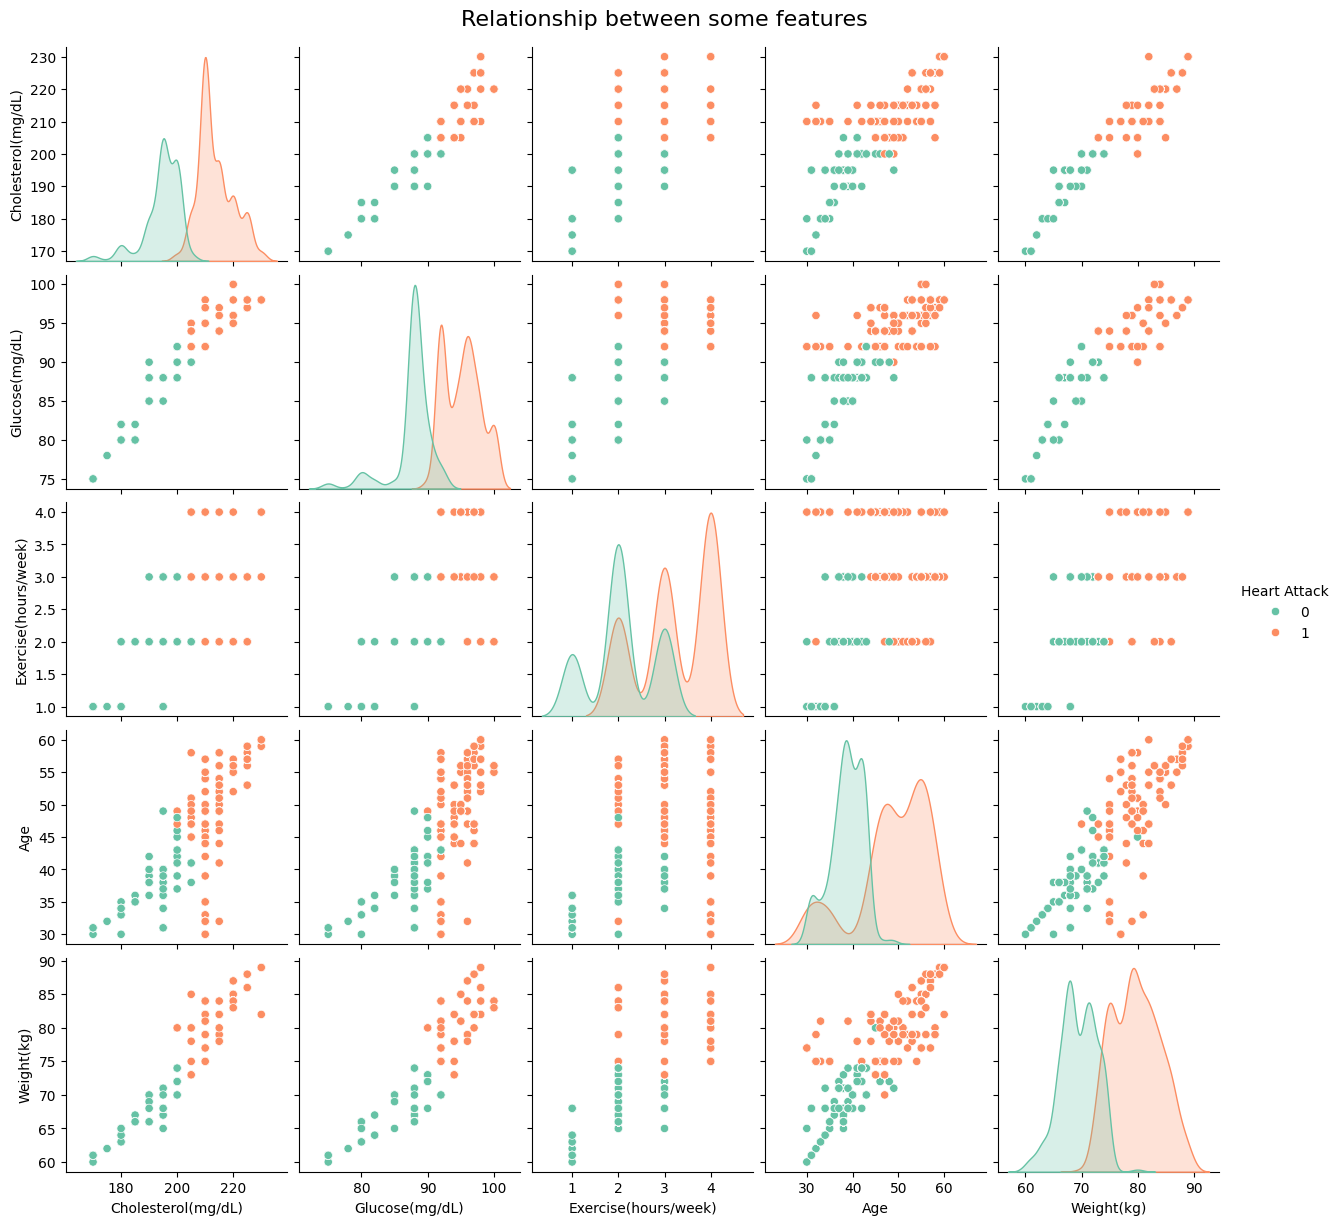

In [10]:
plt.figure(figsize=(9,8))
pair_plot = sns.pairplot(df, 
             x_vars = ['Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Exercise(hours/week)', 'Age', 'Weight(kg)'] ,
             y_vars = ['Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Exercise(hours/week)', 'Age', 'Weight(kg)'],
             hue='Heart Attack', palette='Set2') 

# to adjust the layout to make room for the title
pair_plot.fig.subplots_adjust(top=0.95)

# Add a title to the figure
pair_plot.fig.suptitle('Relationship between some features', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Box plot of Cholesterol levels within age groups')

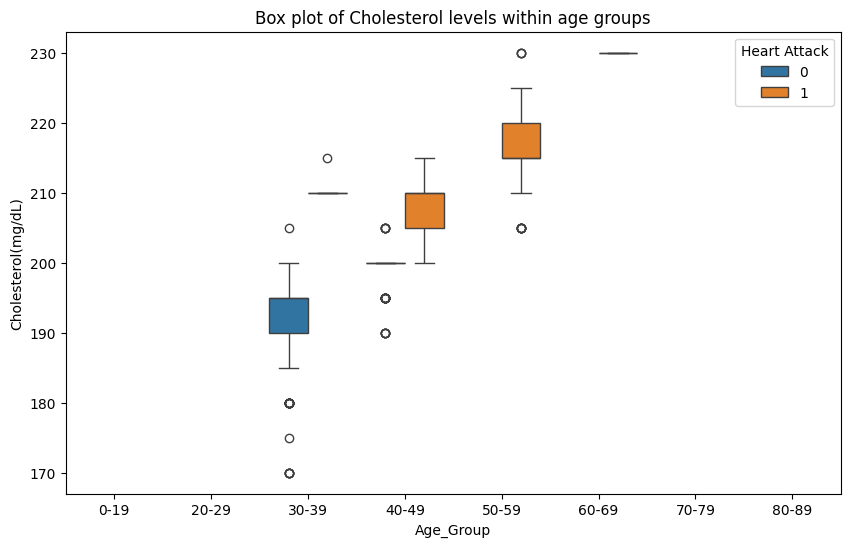

In [11]:
# box plot of cholesterol levels in between patients of certain age groups

# create buckets to hold ages between intervals
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# ceeate new column with age groups
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(data = df, x = 'Age_Group', y = 'Cholesterol(mg/dL)', hue='Heart Attack').set_title('Box plot of Cholesterol levels within age groups')

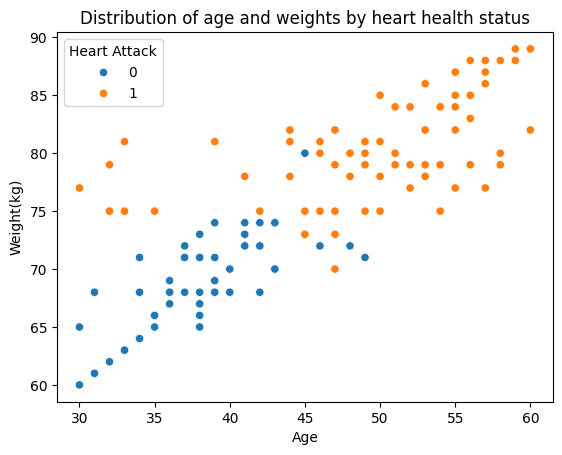

In [12]:
sns.scatterplot(data=df, x = 'Age', y = 'Weight(kg)', hue='Heart Attack')
plt.title('Distribution of age and weights by heart health status')
plt.show()

<Axes: >

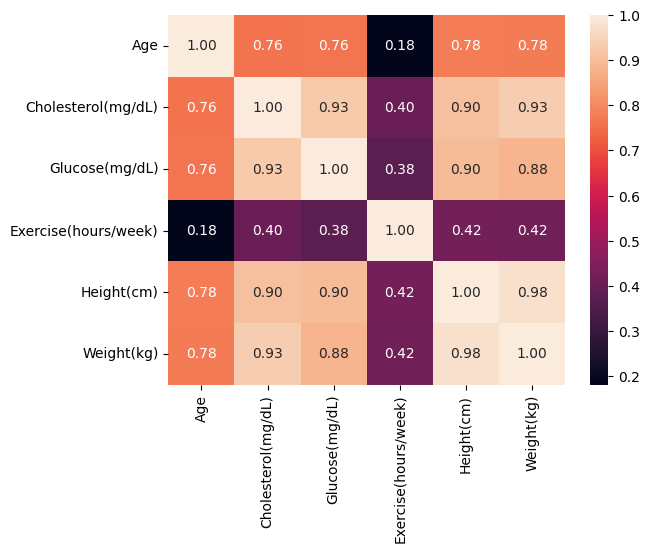

In [13]:
cols = ['Age', 'Cholesterol(mg/dL)', 'Glucose(mg/dL)', 'Exercise(hours/week)',
        'Height(cm)', 'Weight(kg)']
sns.heatmap(data= df[cols].corr(), annot=True, fmt='.2f')

**Summary of resukts gotten from data**

1. More men in their mid 50s to early 60s are non-smokera as compared to men who are smokers from their late 40s to late 50s. We can see almost an equal distribution of females smokers and non-smokers from mid 30s to mid 40s, with less female smoker in their early 30s
2. 73.3% of the total patients were males while 26.7% were females.
3. the average age of patients mostly likely to get heart attack are those in their early 50s (both smokers and non-smokers), compared to the younger population.
5. The weights of patients were associated with the likelihood of having an heart attack, the higher the glucose level, the higher the risk of having heart failure.
6. Older patients were more prone to having heart aatacks.
7. Age is associated with weight and chances of having an heart attack. 

In [14]:
# transform Blood Pressure(mmHg)

df['Blood Pressure(mmHg)'].unique()

array(['120/80', '110/70', '130/85', '115/75', '125/80', '105/65',
       '135/85', '118/72', '128/82', '120/78', '122/80', '108/68',
       '132/84', '116/74', '123/78', '130/83', '117/73', '119/75',
       '133/85', '112/72', '124/78', '121/77', '126/82', '109/69',
       '130/82', '122/78', '113/71', '124/79', '118/75', '115/70',
       '124/80', '120/75', '123/79', '119/78', '125/78', '118/76',
       '121/78', '117/74', '123/80', '116/73'], dtype=object)

In [15]:
# convert blood pressure values to tuples 
bp = df['Blood Pressure(mmHg)'].str.replace('/', ' ')
bp_values = [tuple(map(int, bp_string.split())) for bp_string in bp]

# create a function to catgorize blood pressure 
def categorize_blood_pressure(systolic, diastolic):
    """
    Parameters:
    systolic (int): The systolic blood pressure value.
    diastolic (int): The diastolic blood pressure value.
    
    Returns:
    str: The category of the blood pressure reading.
    """
    if systolic > 180 or diastolic > 120:
        return "Hypertensive Crisis"
    elif systolic >= 140 or diastolic >= 90:
        return "Stage 2 Hypertension"
    elif (systolic >= 130 and systolic <= 139) or (diastolic >= 80 and diastolic <= 89):
        return "Stage 1 Hypertension"
    elif (systolic >= 120 and systolic <= 129) and diastolic < 80:
        return "Elevated"
    else:
        return "Normal"

    
def transform_bp_values(bp_values):
     return [categorize_blood_pressure(systolic, diastolic) for systolic, diastolic in bp_values]
    
    
# Transform the blood pressure values into categories
bp_categories = transform_bp_values(bp_values)

# transformed and updated bp, classified into categories    
bloop_pressure_updated = pd.DataFrame({'Blood Pressure': bp, 'BP Level': bp_categories})

In [16]:
# drop old column 
df = df.drop('Blood Pressure(mmHg)', axis=1)

In [17]:
# updated dataframe
new_df = pd.concat([df, bloop_pressure_updated], axis=1)
new_df.head(10)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Age_Group,Blood Pressure,BP Level
0,1,John Doe,45,Male,175,80,200,90,No,3,0,40-49,120 80,Stage 1 Hypertension
1,2,Jane Smith,35,Female,160,65,180,80,No,2,0,30-39,110 70,Normal
2,3,Michael Johnson,55,Male,180,85,220,95,Yes,4,1,50-59,130 85,Stage 1 Hypertension
3,4,Sarah Brown,40,Female,165,70,190,85,No,3,0,40-49,115 75,Normal
4,5,David Lee,50,Male,170,75,210,92,Yes,2,1,50-59,125 80,Stage 1 Hypertension
5,6,Emily Davis,30,Female,155,60,170,75,No,1,0,30-39,105 65,Normal
6,7,Robert Wilson,60,Male,175,82,230,98,No,3,1,60-69,135 85,Stage 1 Hypertension
7,8,Amanda Martinez,38,Female,162,68,195,88,No,2,0,30-39,118 72,Normal
8,9,Christopher Taylor,48,Male,178,78,205,94,Yes,4,1,40-49,128 82,Stage 1 Hypertension
9,10,Laura Garcia,42,Female,168,72,200,90,Yes,3,0,40-49,120 78,Elevated


**Stage 1 Hypertension**: This category reflects patients with elevated blood pressure levels that are slightly above normal but not yet severe.
**Elevated BP Level**: This indicates patients with higher than normal blood pressure but below the threshold for Stage 1 Hypertension.
**Normal BP Level**: This includes patients with blood pressure readings within the standard healthy range.

In [18]:
new_df['BP Level'].unique()

array(['Stage 1 Hypertension', 'Normal', 'Elevated'], dtype=object)

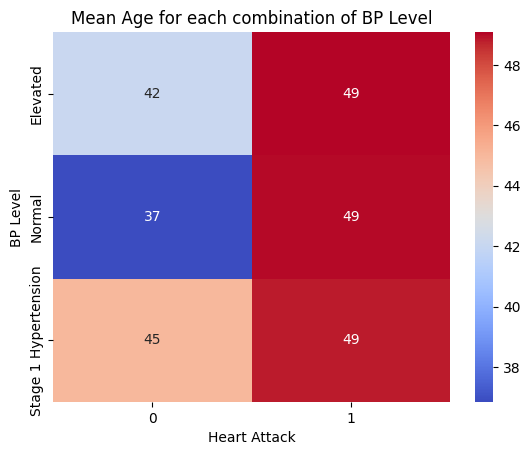

In [39]:
# the mean age for each combination of BP Level and Heart Attack status
pivot_table = new_df.pivot_table(values='Age', index='BP Level', columns='Heart Attack', aggfunc=np.mean)

sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Mean Age for each combination of BP Level')
plt.show()

1. **Elevated BP Level:** The average age of patients with elevated blood pressure is 42 years. For those who have had a heart attack, the average age is 49 years.

2. **Normal BP Level:** The average age of patients with normal blood pressure is 37 years. For patients with a heart attack and normal blood pressure, the average age is 49 years.

3. **Stage 1 Hypertension:** The average age of patients with Stage 1 hypertension who do not have a heart attack is 45 years. For patients with Stage 1 hypertension who have had a heart attack, the average age is 49 years- **Stage 1 Hypertension**: This category reflects patients with elevated blood pressure levels that are slightly above normal but not yet severe.

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    724 non-null    int64   
 1   Name                  724 non-null    object  
 2   Age                   724 non-null    int64   
 3   Gender                724 non-null    object  
 4   Height(cm)            724 non-null    int64   
 5   Weight(kg)            724 non-null    int64   
 6   Cholesterol(mg/dL)    724 non-null    int64   
 7   Glucose(mg/dL)        724 non-null    int64   
 8   Smoker                724 non-null    object  
 9   Exercise(hours/week)  724 non-null    int64   
 10  Heart Attack          724 non-null    int64   
 11  Age_Group             724 non-null    category
 12  Blood Pressure        724 non-null    object  
 13  BP Level              724 non-null    object  
dtypes: category(1), int64(8), object(5)
memory usage: 74.7+ KB

# MODELING

In [21]:
# to make sure our model understand the blood pressure ressure reading, 
# we split the Blood Pressure culumn unto Systolic and Diastolic Pressure

# Split 'Blood Pressure' into 'Systolic' and 'Diastolic'
new_df[['Systolic_Pressure', 'Diastolic_Pressure']] = new_df['Blood Pressure'].str.split(' ', expand=True)

# Convert to numeric
new_df['Systolic_Pressure'] = pd.to_numeric(new_df['Systolic_Pressure'])
new_df['Diastolic_Pressure'] = pd.to_numeric(new_df['Diastolic_Pressure'])

# drop the previous column
new_df = new_df.drop(columns='Blood Pressure')

In [22]:
new_df.head(10)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Age_Group,BP Level,Systolic_Pressure,Diastolic_Pressure
0,1,John Doe,45,Male,175,80,200,90,No,3,0,40-49,Stage 1 Hypertension,120,80
1,2,Jane Smith,35,Female,160,65,180,80,No,2,0,30-39,Normal,110,70
2,3,Michael Johnson,55,Male,180,85,220,95,Yes,4,1,50-59,Stage 1 Hypertension,130,85
3,4,Sarah Brown,40,Female,165,70,190,85,No,3,0,40-49,Normal,115,75
4,5,David Lee,50,Male,170,75,210,92,Yes,2,1,50-59,Stage 1 Hypertension,125,80
5,6,Emily Davis,30,Female,155,60,170,75,No,1,0,30-39,Normal,105,65
6,7,Robert Wilson,60,Male,175,82,230,98,No,3,1,60-69,Stage 1 Hypertension,135,85
7,8,Amanda Martinez,38,Female,162,68,195,88,No,2,0,30-39,Normal,118,72
8,9,Christopher Taylor,48,Male,178,78,205,94,Yes,4,1,40-49,Stage 1 Hypertension,128,82
9,10,Laura Garcia,42,Female,168,72,200,90,Yes,3,0,40-49,Elevated,120,78


In [23]:
# encode 'Gender and Smoker' columns 
new_df['Gender'] = new_df['Gender'].replace({'Male': 1, 'Female':0})
new_df['Smoker'] = new_df['Smoker'].replace({'No':0, 'Yes': 1})

In [24]:
# updated dataframe 
new_df.head(10)

,ID,Name,Age,Gender,Height(cm),Weight(kg),Cholesterol(mg/dL),Glucose(mg/dL),Smoker,Exercise(hours/week),Heart Attack,Age_Group,BP Level,Systolic_Pressure,Diastolic_Pressure
0,1,John Doe,45,1,175,80,200,90,0,3,0,40-49,Stage 1 Hypertension,120,80
1,2,Jane Smith,35,0,160,65,180,80,0,2,0,30-39,Normal,110,70
2,3,Michael Johnson,55,1,180,85,220,95,1,4,1,50-59,Stage 1 Hypertension,130,85
3,4,Sarah Brown,40,0,165,70,190,85,0,3,0,40-49,Normal,115,75
4,5,David Lee,50,1,170,75,210,92,1,2,1,50-59,Stage 1 Hypertension,125,80
5,6,Emily Davis,30,0,155,60,170,75,0,1,0,30-39,Normal,105,65
6,7,Robert Wilson,60,1,175,82,230,98,0,3,1,60-69,Stage 1 Hypertension,135,85
7,8,Amanda Martinez,38,0,162,68,195,88,0,2,0,30-39,Normal,118,72
8,9,Christopher Taylor,48,1,178,78,205,94,1,4,1,40-49,Stage 1 Hypertension,128,82
9,10,Laura Garcia,42,0,168,72,200,90,1,3,0,40-49,Elevated,120,78


In [25]:
# we make use of the relevant features 
# split the data into features and targets

X = new_df[['Age', 'Gender', 'Height(cm)', 'Weight(kg)', 'Cholesterol(mg/dL)',
            'Glucose(mg/dL)', 'Smoker', 'Exercise(hours/week)',
            'Systolic_Pressure', 'Diastolic_Pressure']]
y = new_df[['Heart Attack']]

In [26]:
# training and test set 
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=232)

In [27]:
print((train_x.shape, test_x.shape[0]))

((543, 10), 181)


# LOGISTIC REGRESSION 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(train_x)
X_test = scaler.transform(test_x)

# initialize model
log_reg = LogisticRegression()
log_reg.fit(X_train, train_y)

C:\Users\DAVID\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
# make prediction
pred_y = log_reg.predict(X_test)

In [30]:
#  Evaluate the model
accuracy = accuracy_score(test_y, pred_y)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [31]:
classification_report = classification_report(test_y, pred_y)
print('Classification Report for Logistic Regression Model:')
print(classification_report)

Classification Report for Logistic Regression Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       111

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



## KERAS

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import AUC

In [33]:
# Build the Model

# keras sequential layer 
model = Sequential()
# First hidden layer with 32 units
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# Second  hidden layer with 16 units
model.add(Dense(16, activation='relu'))
# Output layer with 1 unit (for binary classification)
model.add(Dense(1, activation='sigmoid'))

In [34]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# fit the model 
model.fit(X_train, train_y, epochs=20, batch_size=10, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 6s 29ms/step - loss: 0.5644 - accuracy: 0.6498 - val_loss: 0.4329 - val_accuracy: 0.8349
Epoch 2/20
44/44 [==============================] - 0s 8ms/step - loss: 0.3197 - accuracy: 0.9378 - val_loss: 0.2439 - val_accuracy: 0.9266
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 0.1640 - accuracy: 0.9839 - val_loss: 0.1341 - val_accuracy: 1.0000
Epoch 4/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0905 - accuracy: 0.9954 - val_loss: 0.0838 - val_accuracy: 1.0000
Epoch 5/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 0.9954 - val_loss: 0.0571 - val_accuracy: 1.0000
Epoch 6/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0432 - accuracy: 0.9954 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.0339 - accuracy: 0.9954 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 8/20
44/44 [=

In [36]:
# test loss & test accuracy 
test_loss, test_acc = model.evaluate(X_test, test_y)

6/6 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000


In [37]:
print('Test accuracy:', test_acc)

Test accuracy: 1.0


We achieved an accuracy of 100% with Keras, the same as with logistic regression. Both models correctly identified all the values in the dataset. 

## LIMITATIONS

1. **Data Coverage and Limitations**: The dataset used for this analysis did not contain sufficient information to include patients across all possible blood pressure (BP) level categories when the feature to classify BP Level was introduced. The dataset only provided data for three categories: **Stage 1 Hypertension**, **Elevated**, and **Normal** blood pressure. Unfortunately, **Stage 2 Hypertension** and **Hypertensive Crisis** categories were not represented in the available data.


The absence of **Stage 2 Hypertension** and **Hypertensive Crisis** in the dataset means that we could not analyze or compare these more severe categories. **Stage 2 Hypertension** refers to more severe hypertension requiring medical intervention, while **Hypertensive Crisis** represents extremely high blood pressure that poses immediate health risks.

**Impact of Limited Data**: The lack of representation for these categories limits the scope of my analysis. With more comprehensive data that includes all BP level categories, we would be able to implement a model that generalizes well to unseen data.

## ADDRESSING LIMITATION 
To address these gaps, future data collection efforts should aim to include a representative sample of all BP level categories, including Stage 2 Hypertension and Hypertensive Crisis. This will enhance the depth of the analysis and provide more comprehensive insights into how different levels of hypertension impact patient characteristics.

